In [89]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [90]:
def load_img():
    blank_img=np.zeros((600,600))
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(blank_img, text='ABCDE', org=(50,300), fontFace=font, fontScale=5, color=(255,255,255),thickness=23)
    return blank_img

In [102]:

def display_img(img):
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap='gray')

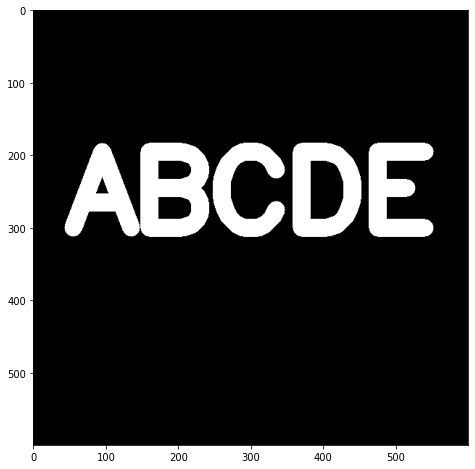

In [103]:
#Create an image with laters
img = load_img()
display_img(img)

In [104]:
#Kernels for erosion
kernel = np.ones((5,5),dtype=np.uint8)

In [105]:
results = cv2.erode(img,kernel,iterations=1)

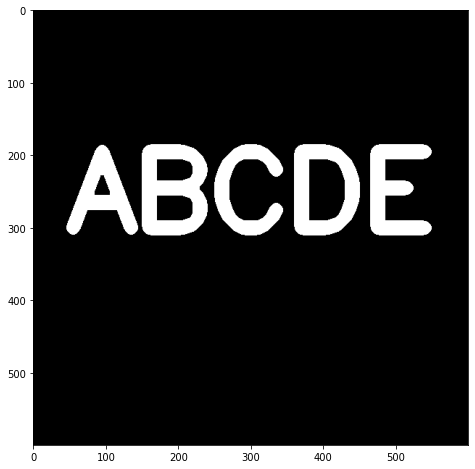

In [106]:
display_img(results)

In [107]:
#The next effect that we're going to learn is a dilatation, that is the opposite of erosion. 
#We have to removing the background noise. 

img = load_img()
white_noise = np.random.randint(low=0, high=2, size=(600,600))

In [108]:
white_noise

array([[0, 0, 0, ..., 1, 0, 1],
       [1, 0, 1, ..., 1, 1, 1],
       [0, 0, 1, ..., 0, 1, 1],
       ...,
       [0, 0, 1, ..., 1, 0, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 1, 1, ..., 1, 1, 0]])

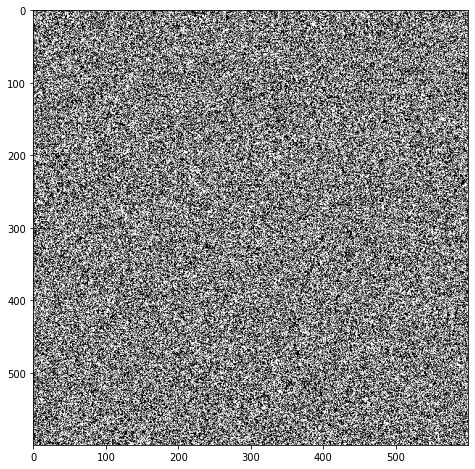

In [109]:
display_img(white_noise)

In [ ]:

#Now we have to put this radiant image in the original text image

In [110]:
img.max()

255.0

In [111]:
#We need convert the 1's of white_noise image in 255:
white_noise = white_noise * 255


In [112]:
white_noise

array([[  0,   0,   0, ..., 255,   0, 255],
       [255,   0, 255, ..., 255, 255, 255],
       [  0,   0, 255, ...,   0, 255, 255],
       ...,
       [  0,   0, 255, ..., 255,   0, 255],
       [  0,   0,   0, ..., 255, 255, 255],
       [  0, 255, 255, ..., 255, 255,   0]])

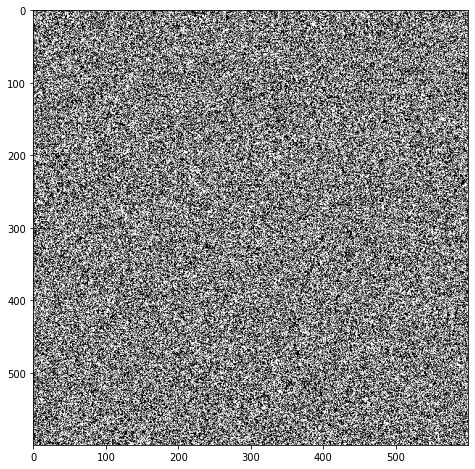

In [113]:
display_img(white_noise)

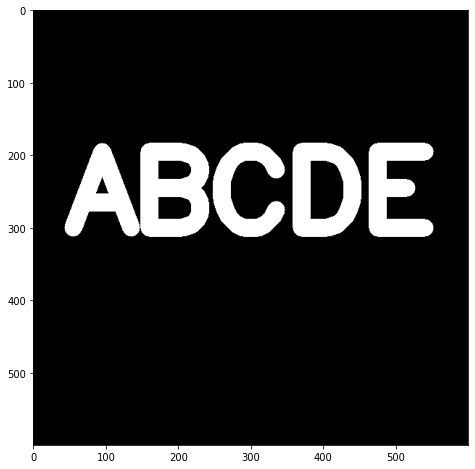

In [114]:
display_img(img)

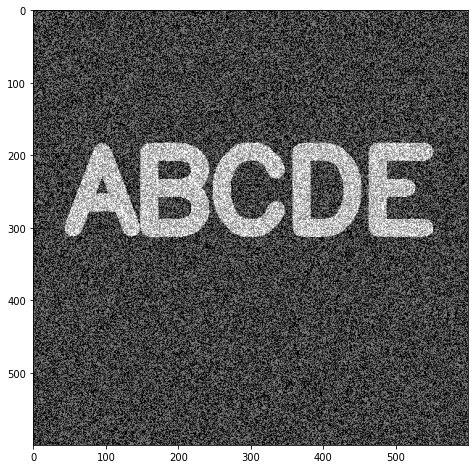

In [115]:
noise_img = white_noise + img
display_img(noise_img)

In [116]:
###################################################################
#OPENING which is a technique as a morphological operator to undo that noise
opening = cv2.morphologyEx(noise_img,cv2.MORPH_OPEN, kernel)

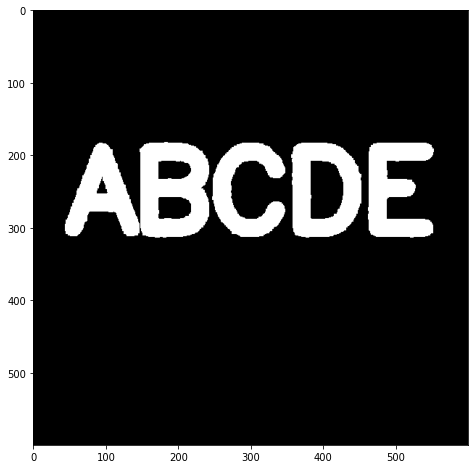

In [119]:
#We removed the noise
display_img(opening)

In [120]:
##################################################
#OPENING is useful for images with foreground noise
img = load_img()


In [122]:
black_noise = np.random.randint(low=0,high=2,size=(600,600))

In [123]:
black_noise

array([[1, 1, 0, ..., 1, 1, 1],
       [0, 1, 0, ..., 1, 0, 1],
       [0, 0, 0, ..., 1, 1, 1],
       ...,
       [0, 1, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 0, 1, 1],
       [1, 1, 1, ..., 0, 1, 1]])

In [124]:
black_noise = black_noise* -255

In [128]:
black_noise

array([[-255, -255,    0, ..., -255, -255, -255],
       [   0, -255,    0, ..., -255,    0, -255],
       [   0,    0,    0, ..., -255, -255, -255],
       ...,
       [   0, -255,    0, ..., -255, -255,    0],
       [   0,    0,    0, ...,    0, -255, -255],
       [-255, -255, -255, ...,    0, -255, -255]])

In [129]:
black_noise_img = img + black_noise

In [130]:
black_noise_img

array([[-255., -255.,    0., ..., -255., -255., -255.],
       [   0., -255.,    0., ..., -255.,    0., -255.],
       [   0.,    0.,    0., ..., -255., -255., -255.],
       ...,
       [   0., -255.,    0., ..., -255., -255.,    0.],
       [   0.,    0.,    0., ...,    0., -255., -255.],
       [-255., -255., -255., ...,    0., -255., -255.]])

In [131]:
black_noise_img[black_noise_img==-255]= 0

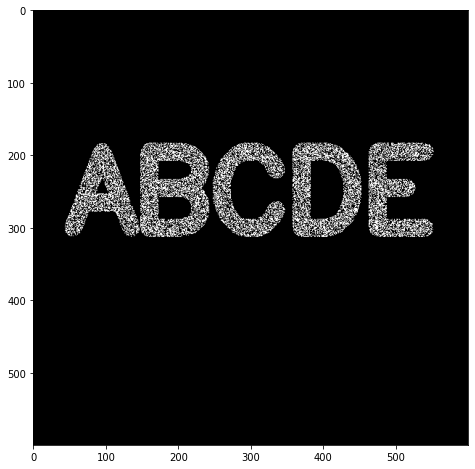

In [132]:
display_img(black_noise_img)

In [133]:
closing = cv2.morphologyEx(black_noise_img,cv2.MORPH_CLOSE, kernel)

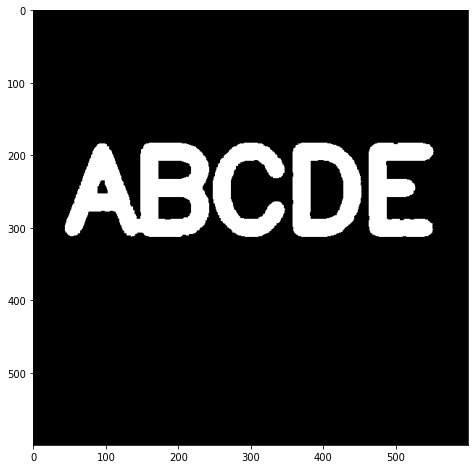

In [134]:
display_img(closing)

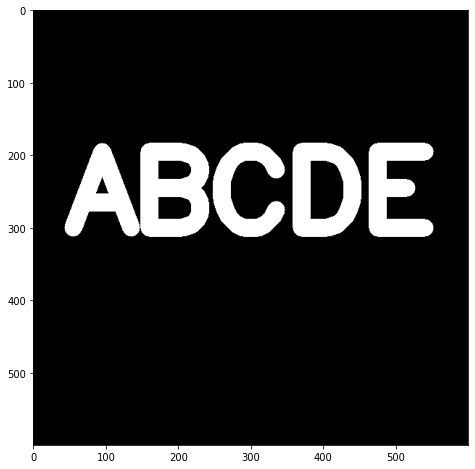

In [135]:
##############################
#Dicuss morphological gradient
img = load_img()
display_img(img)


In [136]:
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT,kernel)

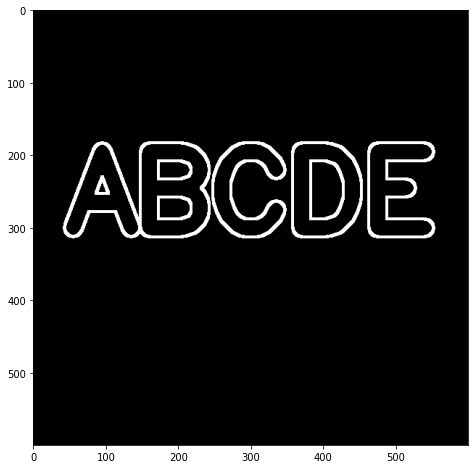

In [137]:
display_img(gradient)